In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
# Terei que tratar dessas categorias.
credito = pd.read_excel("Limite_Credito_Dummy.xlsx")
credito.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


###A primeira forma que foi ensinada quando precisavamos utilizar varias colunas era utilizando a variavel Dummy. Agora vamos utiliza uma biblioteca do sklearn com a função que chata Label encoder. Funcionando de forma parecida com a variavel Dummy

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#escolaridade
le.fit(credito.Escolaridade) 
credito.Escolaridade = le.transform(credito.Escolaridade)

# gênero
le.fit(credito.Gênero) 
credito.Gênero = le.transform(credito.Gênero)

#regiao
le.fit(credito.Região) 
credito.Região = le.transform(credito.Região)

In [7]:
# Agora já temos categorizado de forma númerica.
credito.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,0,0,0,500
1,68,5000,5000,380,0,0,0,600
2,44,5800,5800,500,0,0,0,800
3,72,4300,4300,2000,0,0,0,1000
4,75,4400,4400,3000,0,0,0,1000


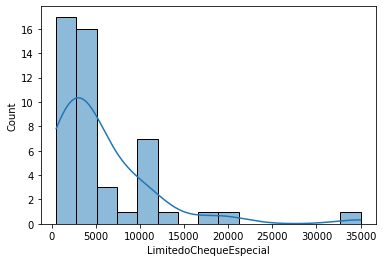

In [8]:
sns.histplot(credito, x="LimitedoChequeEspecial", kde=True)

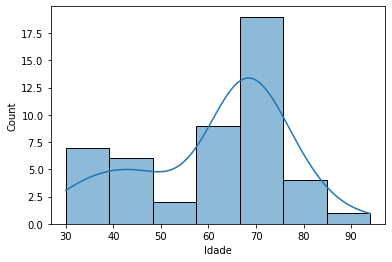

In [9]:
sns.histplot(credito, x="Idade", kde=True)

In [10]:
# temos medidas bem diferentes sendo importante fazer a normalização.
credito.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,0.375000,0.458333,0.500000,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,0.489246,0.503534,0.505291,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,0.000000,0.000000,0.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,0.000000,0.000000,0.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,0.000000,0.000000,0.500000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,1.000000,1.000000,1.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,1.000000,1.000000,1.000000,35000.000000


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

credito_norm = pd.DataFrame(scaler.fit_transform(credito), index=credito.index, columns=credito.columns)

In [12]:
credito_norm.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.491536,0.103978,0.128388,0.580762,0.375000,0.458333,0.500000,0.148427
std,0.238820,0.164806,0.184894,0.296865,0.489246,0.503534,0.505291,0.177736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265625,0.027119,0.038100,0.501582,0.000000,0.000000,0.000000,0.051087
50%,0.570312,0.053455,0.066828,0.525316,0.000000,0.000000,0.500000,0.088406
75%,0.625000,0.105323,0.121570,0.841772,1.000000,1.000000,1.000000,0.173913
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
import statsmodels.formula.api as smf

In [14]:
function ="LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade+Gênero+Região"
model = smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Mon, 20 Feb 2023   Prob (F-statistic):           7.44e-17
Time:                            15:27:39   Log-Likelihood:                 67.328
No. Observations:                      48   AIC:                            -118.7
Df Residuals:                          40   BIC:                            -103.7
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [15]:
function ="LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade+Gênero+Região"
model = smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Mon, 20 Feb 2023   Prob (F-statistic):           9.97e-18
Time:                            15:28:11   Log-Likelihood:                 67.299
No. Observations:                      48   AIC:                            -120.6
Df Residuals:                          41   BIC:                            -107.5
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [16]:
function ="LimitedoChequeEspecial~RendimentoTotal+Salario+Escolaridade+Gênero+Região"
model = smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.884
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     64.26
Date:                    Mon, 20 Feb 2023   Prob (F-statistic):           1.39e-18
Time:                            15:28:42   Log-Likelihood:                 67.097
No. Observations:                      48   AIC:                            -122.2
Df Residuals:                          42   BIC:                            -111.0
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [17]:
function ="LimitedoChequeEspecial~RendimentoTotal+Salario+Gênero+Região"
model = smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.883
Model:                                OLS   Adj. R-squared:                  0.872
Method:                     Least Squares   F-statistic:                     80.75
Date:                    Mon, 20 Feb 2023   Prob (F-statistic):           2.02e-19
Time:                            15:28:55   Log-Likelihood:                 66.709
No. Observations:                      48   AIC:                            -123.4
Df Residuals:                          43   BIC:                            -114.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [19]:
# Utiizando o método backwards consegui chegar em um R quadra ajustado de mais de 92%
function ="LimitedoChequeEspecial~Salario+Gênero+Região -1"
model = smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.925
Model:                                OLS   Adj. R-squared (uncentered):              0.920
Method:                     Least Squares   F-statistic:                              185.0
Date:                    Mon, 20 Feb 2023   Prob (F-statistic):                    2.56e-25
Time:                            15:29:16   Log-Likelihood:                          64.573
No. Observations:                      48   AIC:                                     -123.1
Df Residuals:                          45   BIC:                                     -117.5
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [20]:
x = credito_norm[["Salario","Gênero", "Região"]]

y = credito_norm[["LimitedoChequeEspecial"]]

In [21]:
# Train test split
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state= 42)
lr = LinearRegression()
lr.fit(x,y)
LinearRegression()

LinearRegression()

In [23]:
r_sqr = lr.score(x,y)
r_sqr

0.8791882143098557

In [28]:
y_pred_treino = lr.predict(x_treino)
print("MAE:", metrics.mean_absolute_error(y_treino,y_pred_treino))
print("MSE:", metrics.mean_squared_error(y_treino,y_pred_treino))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_treino,y_pred_treino)))

MAE: 0.03535260038720454
MSE: 0.0024122510423403173
RMSE: 0.04911467237333786


In [29]:
y_pred_teste = lr.predict(x_teste)
print("MAE:", metrics.mean_absolute_error(y_teste,y_pred_teste))
print("MSE:", metrics.mean_squared_error(y_teste,y_pred_teste))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_teste,y_pred_teste)))

MAE: 0.06543044287056327
MSE: 0.008770831909357938
RMSE: 0.09365271971148482
